<a href="https://colab.research.google.com/github/anandaditya07/ML_LAB/blob/main/Experiment_6_Classification_of_Iris_Flower_Species_using_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 6 : Classification of Iris Flower Species using Support Vector Machine (SVM)**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [41]:
df.shape

(150, 6)

In [42]:
df.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [43]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [45]:
df['Species'] = df['Species'].replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3))

/tmp/ipython-input-2395063706.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3))


In [46]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


<Axes: >

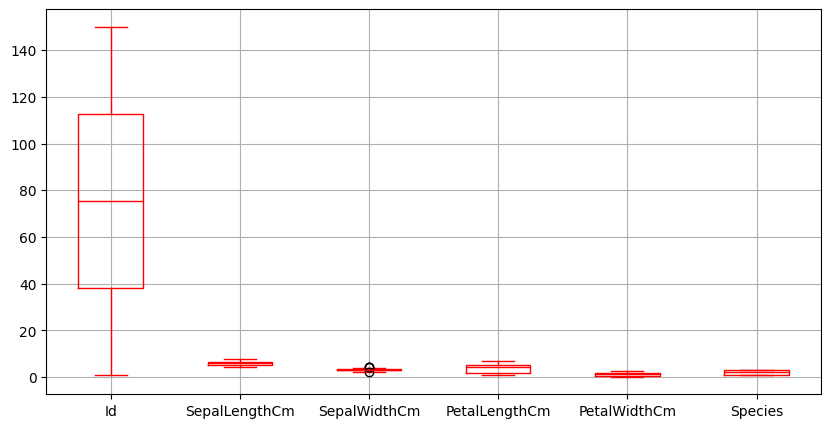

In [48]:
plt.figure(figsize = (10, 5))
df.boxplot(color='red')

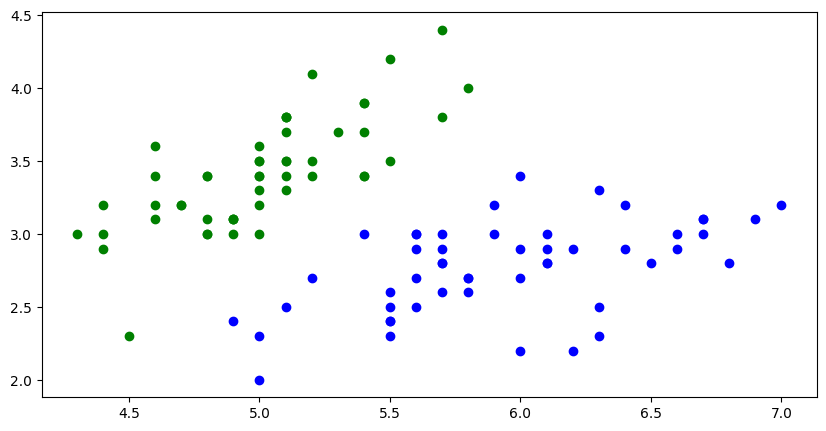

In [50]:
plt.figure(figsize = (10, 5))
df1 = df[df['Species'] == 1]
df2 = df[df['Species'] == 2]
plt.scatter(x=df1['SepalLengthCm'],y=df1['SepalWidthCm'], color='green')
plt.scatter(x=df2['SepalLengthCm'],y=df2['SepalWidthCm'], color='blue')

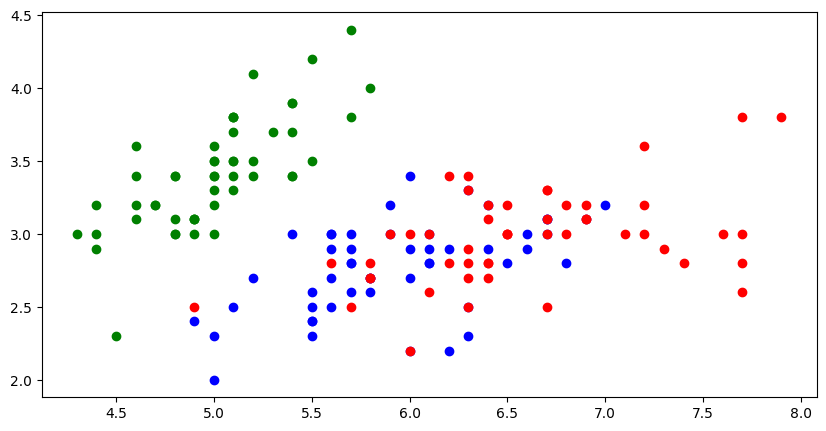

In [53]:
plt.figure(figsize = (10, 5))
df3 = df[df['Species'] == 3]
plt.scatter(x=df1['SepalLengthCm'],y=df1['SepalWidthCm'], color='green')
plt.scatter(x=df2['SepalLengthCm'],y=df2['SepalWidthCm'], color='blue')
plt.scatter(x=df3['SepalLengthCm'],y=df3['SepalWidthCm'], color='red')

In [55]:
x=df.drop(['Species'],axis='columns')
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [57]:
y=df.Species
y.head()

,Species
0,1
1,1
2,1
3,1
4,1


In [58]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [59]:
len(x_train)

120

In [60]:
len(x_test)

30

In [62]:
model = SVC()

In [63]:
model.fit(x_train,y_train)

SVC()

In [64]:
model.score(x_test,y_test )

0.9666666666666667